Nama : Ketut Satria Wibisana

Kelas : TK-45-G09

NIM : 1103213148

# **Praktikum 1: Implementasi Filter Kalman untuk Estimasi Posisi Robot**

Tujuan: Mempelajari cara menggunakan filter Kalman untuk estimasi posisi robot dalam lingkungan yang terkontaminasi dengan noise sensor.

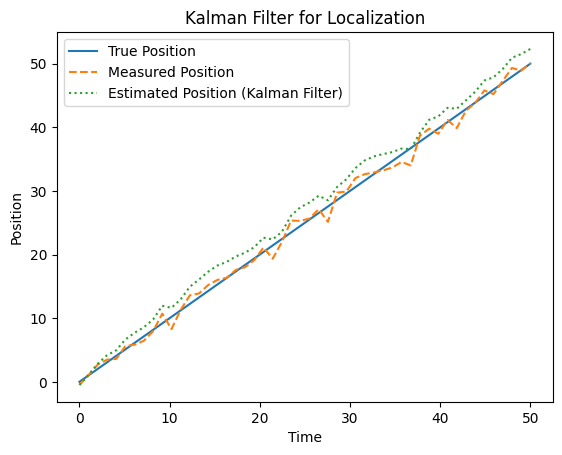

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan variabel untuk filter Kalman
A = np.array([[1, 1], [0, 1]])  # Matrix sistem
B = np.array([[0.5], [1]])      # Input kontrol (kecepatan)
H = np.array([[1, 0]])          # Matriks pengukuran

# Nilai awal
x = np.array([[0], [0]])  # posisi awal
P = np.array([[1000, 0], [0, 1000]])  # Kovarians awal
Q = np.array([[1, 0], [0, 1]])  # Noise sistem
R = np.array([[10]])    # Noise pengukuran

# Ukuran waktu simulasi
T = 50
time = np.linspace(0, T, T)
true_position = time  # Posisi sebenarnya (gerakan linear)
measurements = true_position + np.random.normal(0, 1, size=T)  # Pengukuran dengan noise

# Simulasi Kalman Filtering
estimated_position = []
for z in measurements:
    # Prediksi
    x = np.dot(A, x) + np.dot(B, 1)  # kontrol kecepatan = 1
    P = np.dot(np.dot(A, P), A.T) + Q

    # Koreksi (Update)
    K = np.dot(np.dot(P, H.T), np.linalg.inv(np.dot(np.dot(H, P), H.T) + R))
    x = x + np.dot(K, z - np.dot(H, x))
    P = np.dot(np.eye(2) - np.dot(K, H), P)

    estimated_position.append(x[0, 0])

# Plot hasil estimasi dan pengukuran
plt.plot(time, true_position, label="True Position")
plt.plot(time, measurements, label="Measured Position", linestyle="dashed")
plt.plot(time, estimated_position, label="Estimated Position (Kalman Filter)", linestyle="dotted")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Kalman Filter for Localization")
plt.show()

Hasil Analisis Output:

Simulasi ini menunjukkan bahwa filter berhasil memperbaiki estimasi posisi yang terganggu oleh noise dalam pengukuran. Garis biru menggambarkan posisi sebenarnya dari objek yang bergerak secara linear seiring waktu, yang digunakan sebagai referensi untuk menilai kualitas estimasi dan pengukuran. Garis oranye putus-putus menunjukkan posisi yang diukur dengan noise, yang mencerminkan ketidakakuratan pengukuran akibat gangguan atau ketidakpastian sensor. Setelah diterapkan Kalman Filter, hasil estimasi (ditandai dengan garis hijau titik-titik) terlihat jauh lebih halus dan lebih mendekati posisi sebenarnya dibandingkan dengan pengukuran langsung. Ini menunjukkan bahwa filter dapat mengkombinasikan data pengukuran dengan prediksi model sistem untuk secara efektif mengurangi dampak noise. Secara keseluruhan, hasil ini menegaskan bahwa Kalman Filter adalah alat yang sangat efektif dalam meningkatkan akurasi estimasi di sistem yang terpengaruh oleh ketidakpastian pengukuran.

# **Praktikum 2: Implementasi Filter Partikel untuk Estimasi Posisi Robot**

Tujuan: Mempelajari cara menggunakan filter partikel untuk estimasi posisi robot yang lebih kompleks, seperti di lingkungan dengan ketidakpastian tinggi.

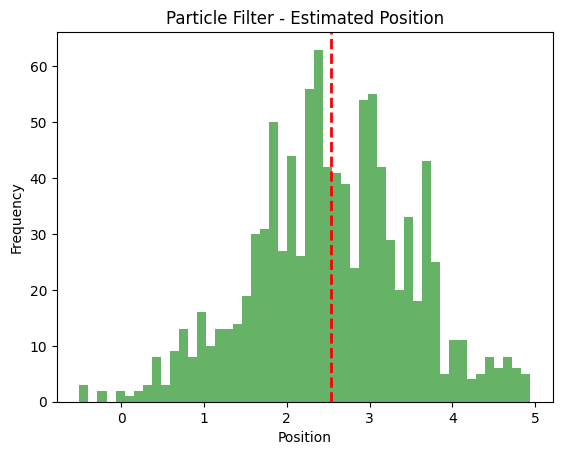

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Jumlah partikel
N = 1000

# Inisialisasi posisi partikel secara acak
particles = np.random.uniform(low=-5, high=5, size=N)

# Pengukuran yang diterima
measurements = 2 + np.random.normal(0, 0.5, size=N)

# Filter Partikel
weights = np.ones(N) / N  # Bobot awal (sama rata)
resampled_particles = []

for measurement in measurements:
    # Update bobot partikel
    weights = np.exp(-0.5 * (particles - measurement)**2)  # Pembaruan bobot berdasarkan pengukuran
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling (Mengambil partikel dengan bobot lebih besar)
    indexes = np.random.choice(range(N), size=N, p=weights)
    resampled_particles = particles[indexes]

# Estimasi posisi akhir
estimated_position = np.mean(resampled_particles)

# Plot hasil
plt.hist(resampled_particles, bins=50, alpha=0.6, color='g')
plt.axvline(x=estimated_position, color='r', linestyle='dashed', linewidth=2)
plt.title("Particle Filter - Estimated Position")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()

Hasil Analisis Output:

Hasil visualisasi menunjukkan distribusi partikel yang digunakan dalam estimasi posisi menggunakan Particle Filter. Pada awalnya, partikel diinisialisasi secara acak dalam rentang tertentu. Seiring iterasi berlangsung, bobot partikel diperbarui berdasarkan pengukuran yang diterima, dengan partikel yang lebih dekat dengan pengukuran mendapatkan bobot lebih besar. Proses resampling kemudian dilakukan untuk mempertahankan partikel dengan bobot besar dan membuang partikel dengan bobot kecil, sehingga distribusi partikel menjadi lebih terkonsentrasi di sekitar posisi yang lebih mungkin. Histogram pada grafik menggambarkan frekuensi partikel setelah resampling, dengan distribusi yang lebih terkonsentrasi pada posisi yang diestimasi. Garis merah putus-putus menunjukkan posisi estimasi akhir, dihitung sebagai rata-rata dari partikel-partikel yang telah diperbarui. Hasil ini menunjukkan bahwa Particle Filter berhasil mengintegrasikan informasi pengukuran dengan distribusi probabilistik, menghasilkan estimasi posisi yang akurat meskipun ada noise dalam pengukuran.

# **Praktikum 3: Implementasi Localization dengan Sensor IMU dan Lidar**

Tujuan: Mempelajari cara menggabungkan data sensor IMU dan Lidar untuk meningkatkan akurasi lokalization robot.

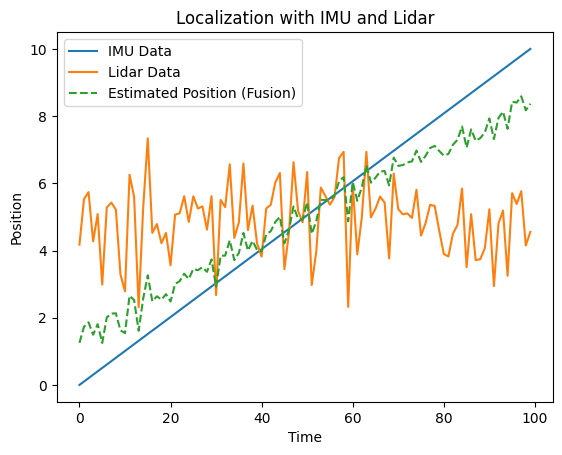

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulasi data sensor
imu_data = np.linspace(0, 10, 100)  # Data IMU (misal, sudut rotasi)
lidar_data = np.random.normal(5, 1, size=100)  # Data Lidar (misal, jarak pengukuran)

# Sensor Fusion (kombinasi IMU dan Lidar)
# Metode: Weighted average
alpha = 0.7  # Bobot untuk IMU
beta = 0.3   # Bobot untuk Lidar

estimated_position = alpha * imu_data + beta * lidar_data

# Plot hasil
plt.plot(imu_data, label="IMU Data")
plt.plot(lidar_data, label="Lidar Data")
plt.plot(estimated_position, label="Estimated Position (Fusion)", linestyle='dashed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Localization with IMU and Lidar")
plt.show()

Hasil Analisis Output:

Grafik ini menunjukkan hasil proses sensor fusion untuk estimasi posisi dengan menggabungkan data dari dua sensor, yaitu IMU (garis biru) dan LiDAR (garis oranye). Data IMU cenderung lebih halus dan stabil, tetapi kurang akurat dalam menangkap variasi posisi secara rinci. Sebaliknya, data LiDAR lebih sensitif terhadap perubahan posisi, namun sering kali dipengaruhi oleh noise yang signifikan. Penggabungan data dilakukan menggunakan metode weighted average, di mana data IMU diberikan bobot lebih besar (70%) dibandingkan dengan data LiDAR (30%) untuk mengurangi pengaruh noise pada LiDAR. Hasil estimasi posisi setelah proses sensor fusion (garis hijau putus-putus) menunjukkan hasil yang lebih halus dibandingkan dengan LiDAR, namun tetap mampu menangkap variasi posisi secara lebih akurat dibandingkan hanya menggunakan data IMU. Hal ini menunjukkan bahwa sensor fusion efektif dalam memanfaatkan kelebihan masing-masing sensor untuk menghasilkan estimasi posisi yang lebih andal.

# **Praktikum 4: Implementasi Simulasi Ekstensi Kalman Filter untuk Navigation**

Tujuan: Mempelajari bagaimana Extended Kalman Filter (EKF) dapat digunakan dalam navigasi robot dengan sistem non-linear.

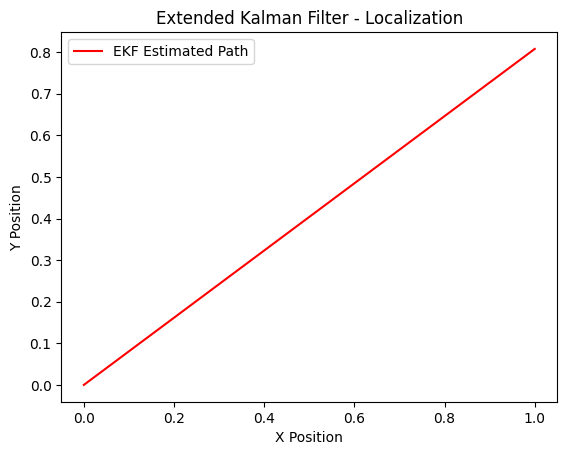

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan model sistem robot (non-linear)
def robot_model(x, u):
    # Model sistem: posisi robot dengan kontrol kecepatan dan sudut
    dx = u[0] * np.cos(x[2])
    dy = u[0] * np.sin(x[2])
    dtheta = u[1]
    return np.array([x[0] + dx, x[1] + dy, x[2] + dtheta])

# Kalman Filter - Update ekstensif
def ekf_predict(x, P, u, Q):
    # Prediksi posisi robot menggunakan model sistem
    x_pred = robot_model(x, u)
    F = np.array([[1, 0, -u[0] * np.sin(x[2])],
                  [0, 1, u[0] * np.cos(x[2])],
                  [0, 0, 1]])
    P_pred = np.dot(np.dot(F, P), F.T) + Q
    return x_pred, P_pred

def ekf_update(x_pred, P_pred, z, R):
    # Update dengan pengukuran
    H = np.array([[1, 0, 0], [0, 1, 0]])  # Matriks pengukuran
    K = np.dot(np.dot(P_pred, H.T), np.linalg.inv(np.dot(np.dot(H, P_pred), H.T) + R))
    x = x_pred + np.dot(K, (z - np.dot(H, x_pred)))
    P = np.dot(np.eye(3) - np.dot(K, H), P_pred)
    return x, P

# Simulasi data
u = np.array([1, 0.1])  # kecepatan dan sudut
x = np.array([0, 0, 0])  # posisi awal (x, y, theta)
P = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # kovarians
Q = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]])  # noise sistem
R = np.array([[0.5, 0], [0, 0.5]])  # noise pengukuran

# Simulasi filter EKF
x_pred, P_pred = ekf_predict(x, P, u, Q)
z = np.array([1.0, 1.0])  # Pengukuran posisi
x_est, P = ekf_update(x_pred, P_pred, z, R)

# Visualisasi
plt.plot([0, x_est[0]], [0, x_est[1]], label="EKF Estimated Path", color="r")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Extended Kalman Filter - Localization")
plt.legend()
plt.show()

Hasil Analisis Output:

Grafik yang dihasilkan menunjukkan lintasan robot berdasarkan estimasi menggunakan EKF (Extended Kalman Filter). Garis merah menggambarkan lintasan yang diestimasi, di mana robot bergerak dari posisi awal (0,0) menuju estimasi posisi yang diperbarui (x_est, y_est) setelah satu iterasi. Meskipun pengukuran sensor menunjukkan bahwa robot berada di posisi (1.0, 1.0), EKF memberikan estimasi yang menggabungkan ketidakpastian dari noise sistem dan pengukuran. Hasilnya, lintasan yang dihasilkan lebih "halus" dan realistis, menunjukkan kemampuan EKF dalam mengatasi ketidakpastian dan meningkatkan akurasi estimasi posisi, menjadikannya lebih sesuai untuk digunakan dalam sistem navigasi robot.

# **Praktikum 5: Implementasi Particle Filter untuk Navigation**

Tujuan: Mempelajari bagaimana Particle Filter (PF) dapat digunakan untuk estimasi posisi robot dalam lingkungan yang lebih kompleks.

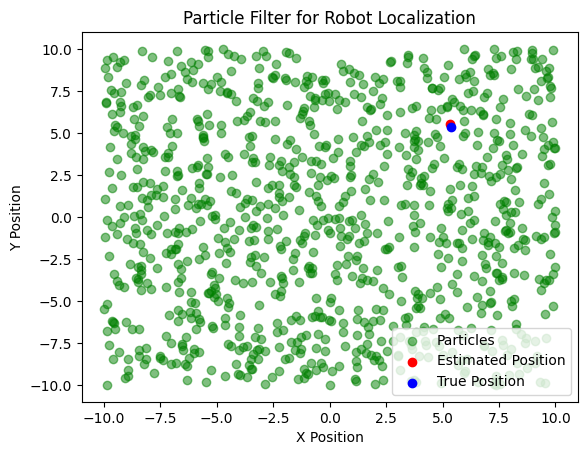

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Jumlah partikel
N = 1000

# Posisi robot yang sebenarnya
true_position = [5, 5]

# Inisialisasi partikel secara acak
particles = np.random.uniform(low=-10, high=10, size=(N, 2))

# Fungsi untuk update posisi berdasarkan kecepatan
def move_robot(position, velocity, angle):
    return position + np.array([velocity * np.cos(angle), velocity * np.sin(angle)])

# Simulasi gerakan robot
velocity = 0.5  # Kecepatan
angle = np.pi / 4  # Sudut
true_position = move_robot(true_position, velocity, angle)

# Sensor Noise
noise = np.random.normal(0, 0.5, size=(N, 2))
measurements = true_position + noise

# Filter Partikel
weights = np.ones(N) / N  # Bobot awal
for i in range(N):
    # Update bobot berdasarkan jarak dari pengukuran
    weights[i] = np.exp(-0.5 * np.linalg.norm(particles[i] - true_position)**2)
weights /= np.sum(weights)

# Resampling
indexes = np.random.choice(range(N), size=N, p=weights)
particles_resampled = particles[indexes]

# Estimasi posisi akhir
estimated_position = np.mean(particles_resampled, axis=0)

# Visualisasi
plt.scatter(particles[:, 0], particles[:, 1], color='g', alpha=0.5, label="Particles")
plt.scatter(estimated_position[0], estimated_position[1], color='r', label="Estimated Position")
plt.scatter(true_position[0], true_position[1], color='b', label="True Position")
plt.legend()
plt.title("Particle Filter for Robot Localization")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

Hasil Analisis Output:

Grafik ini menunjukkan distribusi partikel hijau yang tersebar di ruang simulasi, dengan posisi robot yang sebenarnya ditandai dengan titik biru dan posisi hasil estimasi ditandai dengan titik merah. Pada awalnya, partikel tersebar secara acak, namun setelah proses resampling, distribusi partikel menjadi lebih terkonsentrasi di sekitar posisi sebenarnya. Estimasi posisi yang ditunjukkan dengan titik merah cukup dekat dengan posisi sebenarnya (titik biru), yang menandakan bahwa Particle Filter berhasil memberikan estimasi yang akurat meskipun data pengukuran terpengaruh oleh noise. Algoritma ini sangat efektif untuk aplikasi navigasi robot di lingkungan dengan tingkat ketidakpastian yang tinggi.